### Applied Machine Learning Week 5

- Data Accession with Pandas

In [1]:
import pandas as pd

In [2]:
#number 1 source for dataframes
import seaborn as sns

In [4]:
penguins = sns.load_dataset('penguins')
diamonds = sns.load_dataset('diamonds')

In [7]:
#sns.get_dataset_names()

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

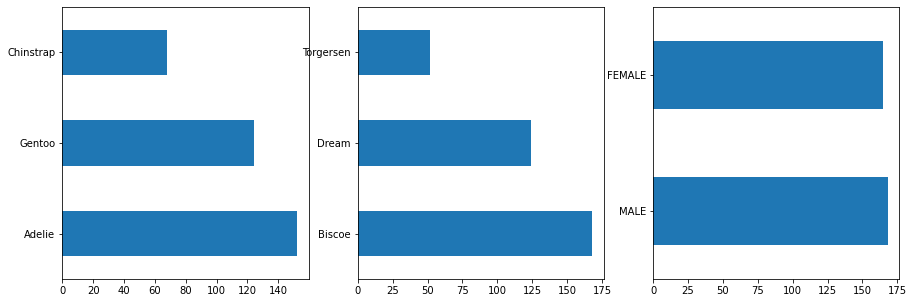

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

penguins['species'].value_counts().plot(kind = 'barh', ax = ax[0]);
penguins['island'].value_counts().plot(kind = 'barh', ax = ax[1])
penguins['sex'].value_counts().plot(kind = 'barh', ax = ax[2]);

In [16]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
sex_groups = penguins.groupby('sex')[['body_mass_g']].mean()

In [29]:
sex_groups

,body_mass_g
sex,
FEMALE,3862.272727
MALE,4545.684524


In [31]:
pd.merge(sex_groups, penguins, left_on = 'sex', right_on = 'sex', how = 'left')

,sex,body_mass_g_x,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g_y
0,FEMALE,3862.272727,Adelie,Torgersen,39.5,17.4,186.0,3800.0
1,FEMALE,3862.272727,Adelie,Torgersen,40.3,18.0,195.0,3250.0
2,FEMALE,3862.272727,Adelie,Torgersen,36.7,19.3,193.0,3450.0
3,FEMALE,3862.272727,Adelie,Torgersen,38.9,17.8,181.0,3625.0
4,FEMALE,3862.272727,Adelie,Torgersen,41.1,17.6,182.0,3200.0
...,...,...,...,...,...,...,...,...
328,MALE,4545.684524,Gentoo,Biscoe,51.5,16.3,230.0,5500.0
329,MALE,4545.684524,Gentoo,Biscoe,55.1,16.0,230.0,5850.0
330,MALE,4545.684524,Gentoo,Biscoe,48.8,16.2,222.0,6000.0
331,MALE,4545.684524,Gentoo,Biscoe,50.4,15.7,222.0,5750.0


In [24]:
for group in sex_groups:
    print(group[1])

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
6    Adelie  Torgersen            38.9           17.8              181.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
..      ...        ...             ...            ...                ...   
332  Gentoo     Biscoe            43.5           15.2              213.0   
334  Gentoo     Biscoe            46.2           14.1              217.0   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   

     body_mass_g     sex  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4     

In [18]:
penguins.groupby('sex')['body_mass_g'].median()

sex
FEMALE    3650.0
MALE      4300.0
Name: body_mass_g, dtype: float64

In [19]:
penguins.groupby('island')['bill_length_mm'].mean()

island
Biscoe       45.257485
Dream        44.167742
Torgersen    38.950980
Name: bill_length_mm, dtype: float64

In [35]:
torg_pengs = penguins.loc[penguins['island'] == 'Torgersen']

In [36]:
torg_pengs['species'].value_counts()

Adelie    52
Name: species, dtype: int64

In [39]:
non_torg_pengs = penguins.loc[(penguins['island'] != 'Torgersen')&(penguins['species']!='Adelie')]

In [40]:
non_torg_pengs['species'].value_counts()

Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [41]:
non_torg_pengs['bill_length_mm'].mean()

47.978010471204186

In [42]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
diamonds.groupby('cut')['carat'].mean()

cut
Fair         1.046137
Good         0.849185
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Name: carat, dtype: float64

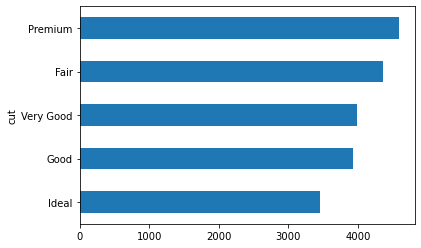

In [47]:
diamonds.groupby('cut')['price'].mean().sort_values().plot(kind = 'barh');

In [48]:
nj_childcare = pd.read_json('https://data.nj.gov/resource/cru5-4rmm.json')

In [49]:
nj_childcare.head()

,county,center,phone,ages,capacity,city,addr1,zip,inspections,addr2
0,Passaic,El Mundo De Colore/World of Colors,973-523-0919,2½ to 6,154,Paterson,44 Ward Street,07501,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
1,Passaic,El Mundo Del Nino/A Child's World,973-279-7100,2½ to 6,116,Paterson,433 Main Street,07501,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
2,Hudson,Concordia Learning Center,201-876-5432,2½ to 6,120,Jersey City,761 Summit Ave.,07307,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
3,Mercer,The Children's Home Society of NJ Afterschool ...,609-695-6274,6 to 13,180,Trenton,1300 Stuyvesant Avenue,08618,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
4,Burlington,Willingboro BOE at Hawthorne School,609-835-8600,2½ to 13,60,Willingboro,84 Hampshire Lane,08046,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN


In [50]:
nj_childcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   county       1000 non-null   object
 1   center       1000 non-null   object
 2   phone        996 non-null    object
 3   ages         1000 non-null   object
 4   capacity     1000 non-null   int64 
 5   city         1000 non-null   object
 6   addr1        1000 non-null   object
 7   zip          1000 non-null   object
 8   inspections  1000 non-null   object
 9   addr2        58 non-null     object
dtypes: int64(1), object(9)
memory usage: 78.2+ KB


In [51]:
nj_childcare['ages'].value_counts()

6 to 13     348
0 to 13     228
2½ to 6     171
0 to 6      128
2½ to 13    116
0 to 2½       4
2 to 6        3
2 to 13       2
Name: ages, dtype: int64

In [52]:
nj_childcare.describe()

,capacity
count,1000.000000
mean,100.297000
std,68.518754
min,13.000000
25%,55.000000
50%,87.500000
75%,125.250000
max,625.000000


In [55]:
nj_childcare.loc[nj_childcare['capacity']>400]

,county,center,phone,ages,capacity,city,addr1,zip,inspections,addr2
66,Passaic,Greater Bergen Community Action - CD Center,973-546-2634,0 to 6,625,Paterson,500 E 35th Street,07504,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
82,Camden,Boys & Girls Club of Camden Co Inc-Marjorie & ...,0,6 to 13,405,Camden,2 South Dudley Street,08105-1100,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
166,Essex,"Boys and Girls Club of Newark, Inc.",973-242-1200,6 to 13,459,Newark,333 Clinton Place,07112,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
190,Camden,Betty & Milton Katz Jewish Community Center Pr...,856-424-4444,0 to 13,414,Cherry Hill,1301 Springdale Rd,08003,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN
338,Essex,NCC/13th Ave Sch Family Friendly Ctr,973-733-7045,6 to 13,538,Newark,359 13th Avenue,07103,{'url': 'http://www.nj.gov/dcf/families/childc...,NaN


In [56]:
import pandas_datareader as pdr

In [57]:
#!pip install pandas_datareader

In [58]:
pdr.get_data_yahoo('PLTR')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-30,11.41,9.11,10.00,9.50,335537500,9.50
2020-10-01,10.10,9.23,9.69,9.46,124297600,9.46
2020-10-02,9.28,8.94,9.06,9.20,55018300,9.20
2020-10-05,9.49,8.92,9.43,9.03,36115000,9.03
2020-10-06,10.18,8.90,9.04,9.90,90339502,9.90


In [59]:
nypd = pd.read_json('https://data.cityofnewyork.us/resource/uip8-fykc.json')

In [60]:
nypd.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,214353678,2020-06-18T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,K,68,...,978016,172087,40.639022,-74.022464,"{'type': 'Point', 'coordinates': [-74.02246352...",18180.0,10,2,7,41
1,210517846,2020-03-04T00:00:00.000,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,...,984331,209268,40.741077,-73.999709,"{'type': 'Point', 'coordinates': [-73.99970914...",12074.0,12,4,10,6
2,209190141,2020-02-07T00:00:00.000,569,"MARIJUANA, SALE 4 & 5",235,DANGEROUS DRUGS,PL 2214000,M,K,70,...,996733,162284,40.612108,-73.955041,"{'type': 'Point', 'coordinates': [-73.95504136...",13513.0,60,2,15,43
3,208085722,2020-01-17T00:00:00.000,639,AGGRAVATED HARASSMENT 2,361,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,Q,101,...,1053650,158969,40.602746,-73.750078,"{'type': 'Point', 'coordinates': [-73.75007786...",20529.0,51,3,47,59
4,214476276,2020-06-23T00:00:00.000,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,B,48,...,1011779,246746,40.843901,-73.900505,"{'type': 'Point', 'coordinates': [-73.90050463...",10935.0,35,5,22,31
